# Imports

In [1]:
!pwd
import sys
import os
import shutil

from bumps.names import *
from bumps.dream.state import load_state
import matplotlib.pyplot as plt

from molgroups.support import molstat

# always use the same testdata
shutil.copyfile('./bu/test0.dat', os.getcwd()+'/test0.dat')

/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/information_theory/simulate_data/SANS/EllipsoidProtein_Single_Dataset


'/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/information_theory/simulate_data/SANS/EllipsoidProtein_Single_Dataset/test0.dat'

# Create Short Example Fit

In [2]:
%%writefile testfit.py
import numpy

from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data, plot_data

# IMPORT THE DATA USED
data = load_data('test0.DAT')

#setattr(data, 'qmin', 0.01)
#setattr(data, 'qmax', 10.0)

# DEFINE THE MODEL
kernel = load_model('ellipsoid@hayter_msa')

pars = dict(scale=6.4, background=0.06, sld=0.33, sld_solvent=2.15, radius_polar=14.0,
            radius_equatorial=24.0, volfraction=0.075, charge=19, temperature=298.0,
            concentration_salt=0.001, dielectconst=71.08)

model = Model(kernel, **pars)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)
model.scale.range(0, 60.)
model.background.range(0, 1)
model.sld.range(-2, 10)
model.sld_solvent.range(0, 5)
model.radius_polar.range(0, 10)
model.radius_equatorial.range(0, 25)
model.volfraction.range(0,0.1)
model.charge.range(0, 20)
model.temperature.range(0, 1000)
model.concentration_salt.range(0, 1)
model.dielectconst.range(0,100)

M = Experiment(data=data, model=model)
problem = FitProblem(M)

Overwriting testfit.py


# Variables

In [3]:
#Example is from https://github.com/SasView/sasmodels/tree/master/example

store = "T"
setupdir = os.getcwd()
runfile = "testfit"
fitsource = "SASView"

burn=2000
steps=500

# Setup Example Fit

In [4]:
fitobj = molstat.CMolStat(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=runfile,
    state=None,
    problem=None,
)

# steps: 500, # draws: 55000
step 1 cost 368.087(58)
                              background |......... 0.00918582 in (0,1)
                                  charge .........|     19.869 in (0,20)
                      concentration_salt ..|.......   0.297158 in (0,1)
                            dielectconst |.........    1.57603 in (0,100)
                       radius_equatorial ...|......     9.5562 in (0,25)
                            radius_polar .....|....    5.44853 in (0,10)
                                   scale ...|......      22.99 in (0,60)
                                     sld ...|......    1.93887 in (-2,10)
                             sld_solvent ...|......     1.6144 in (0,5)
                             temperature ......|...    673.415 in (0,1000)
                             volfraction ....|.....  0.0478211 in (0,0.1)
step 15 cost 80.183(58)
step 30 cost 41.311(58)
step 43 cost 8.826(58)
step 58 cost 8.826(58)
step 73 cost 8.826(58)
step 90 cost 4.715(58)
st

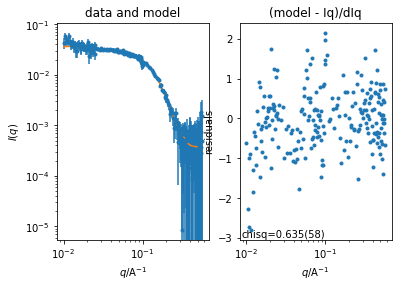

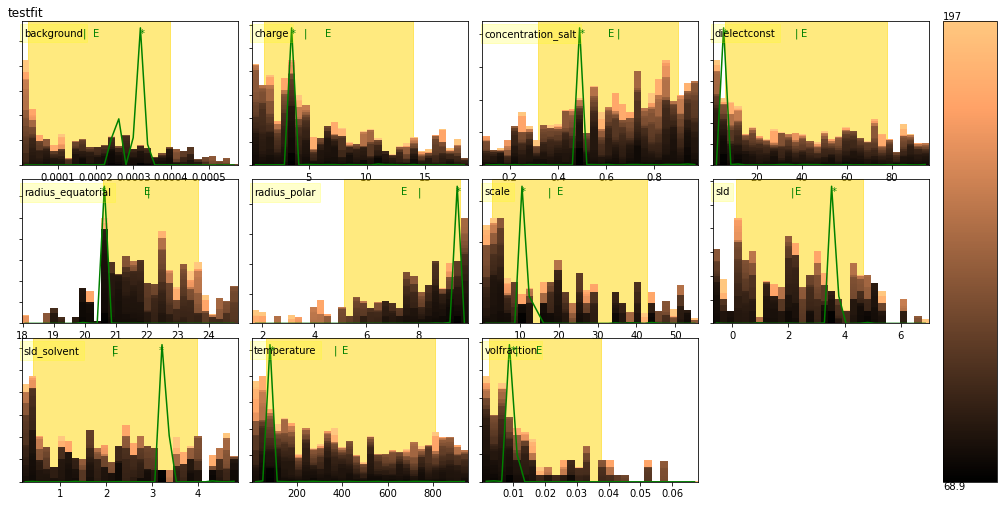

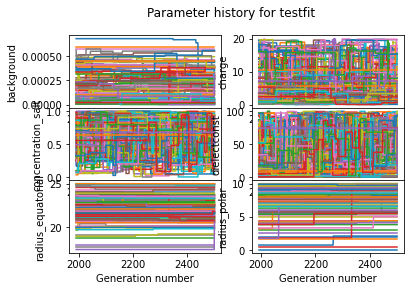

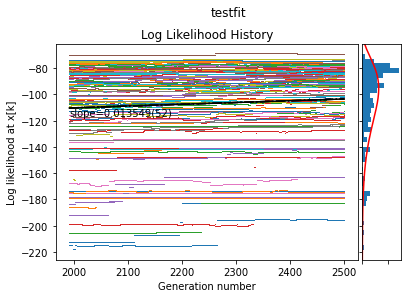

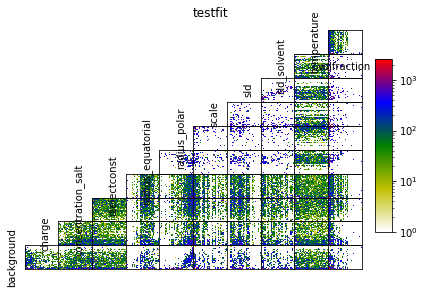

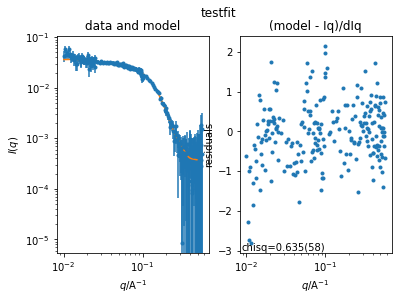

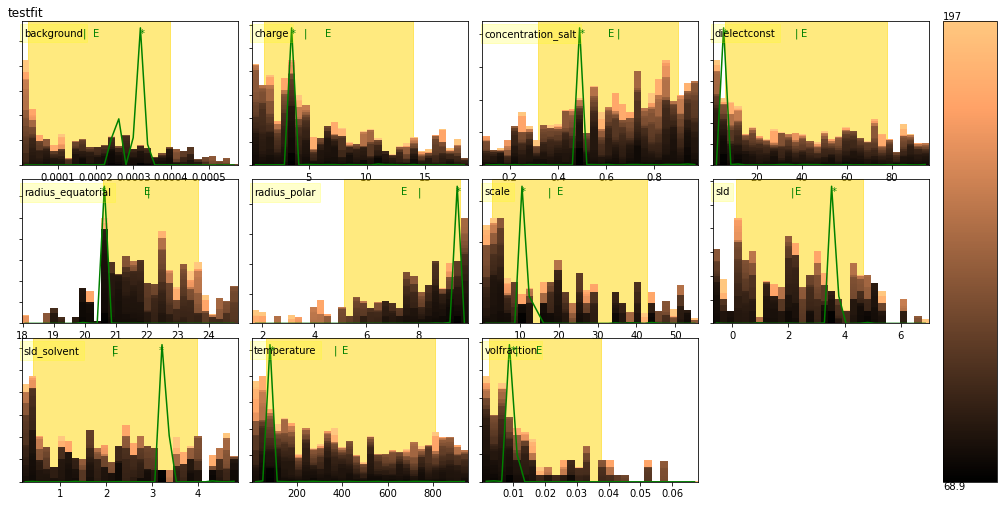

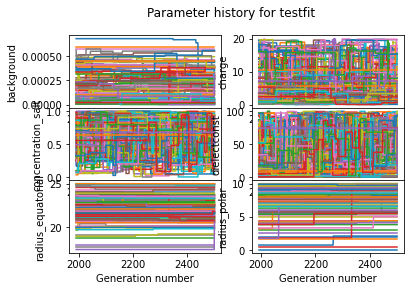

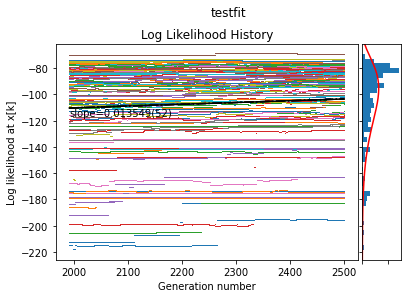

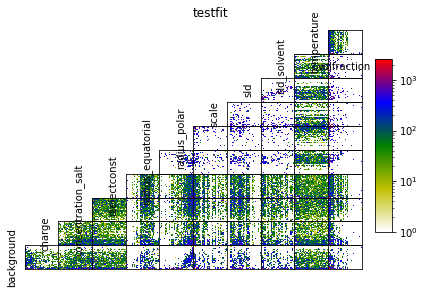

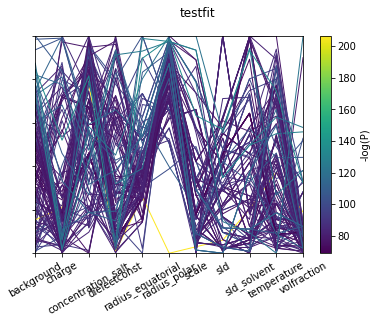

In [5]:
fitobj.Interactor.fnRunMCMC(burn, steps, batch=False)

In [6]:
%%writefile simpar.dat
background 0.00026
charge 0.48
concentration_salt 0.711
dielectconst 76.89
radius_equatorial 20.437
radius_polar  9.061
scale  20.84
sld  3.811
sld_solvent  4.385
temperature  605.5
volfraction  0.0032

Overwriting simpar.dat


In [7]:
sb = 0.059


configuration_dataset1 = [{'lambda': 6.0, "detector_sample_distance": 100, 'time': 1600, 'beam_center_x': 26.416, "differential_cross_section_buffer": sb},
                          {'lambda': 6.0, "detector_sample_distance": 400, 'time': 3600, "differential_cross_section_buffer": sb},
                          {'lambda': 6.0, "detector_sample_distance": 1300, 'time': 4400, "differential_cross_section_buffer": sb}]

configuration = [configuration_dataset1]

fitobj.fnSimulateData(basefilename='test0.DAT', liConfigurations=configuration)

background 0.00026
charge 0.48
concentration_salt 0.711
dielectconst 76.89
radius_equatorial 20.437
radius_polar 9.061
scale 20.84
sld 3.811
sld_solvent 4.385
temperature 605.5
volfraction 0.0032
background 0.00026
charge 0.48
concentration_salt 0.711
dielectconst 76.89
radius_equatorial 20.437
radius_polar 9.061
scale 20.84
sld 3.811
sld_solvent 4.385
temperature 605.5
volfraction 0.0032


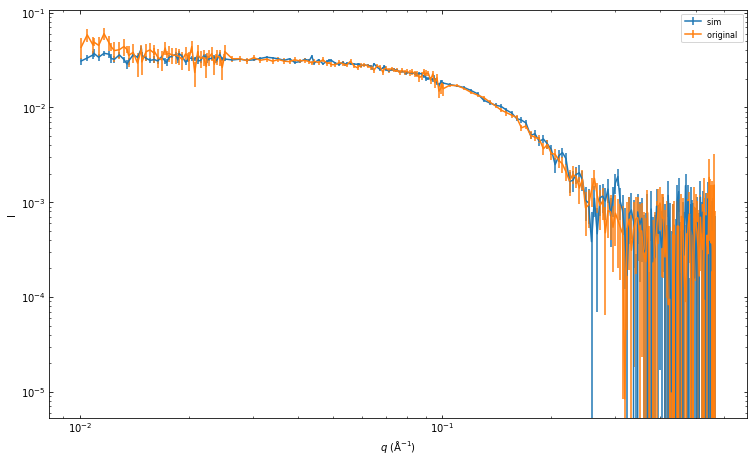

In [8]:
import pandas

fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/test0.DAT', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('test0.DAT', sep=' ', skip_blank_lines=True,comment='#')
ax.errorbar(simdata['Q'], simdata['I'], simdata['dI'], label="sim ")
ax.errorbar(original['Q'], original['I'], original['dI'], label="original ")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("I", fontsize=10)
ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(1e-2, .1)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


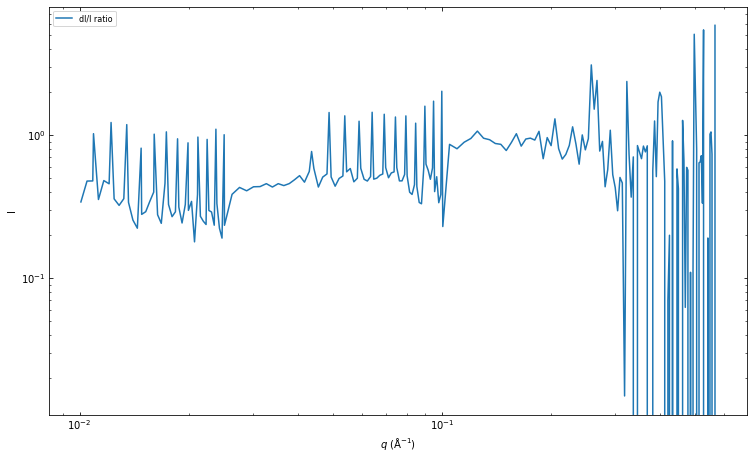

In [9]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/test0.DAT', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('test0.DAT', sep=' ', skip_blank_lines=True,comment='#')
ax.plot(simdata['Q'], (simdata['dI']/simdata['I'])/(original['dI']/original['I']), label="dI/I ratio")
#i += 1

ax.legend(fontsize=8)
ax.set_ylabel("I", fontsize=10)
ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(5e-6, 1)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()
